In [9]:
using RCall
using CSV
using LowRankApprox
using PyPlot

In [15]:
include("../code/julia/QPsubprob.jl");
include("../code/julia/ash.jl");
include("../code/julia/genL.jl");

In [3]:
# include("../code/julia/makedata.jl");
L = Array{Float64,2}(CSV.read("../data/sample100000x100.txt", nullable = false, header = false, delim = ' '));

In [6]:
QPsubprob(L, method = "mosek2")

Dict{String,Any} with 7 entries:
  "q_nnz"       => [4.0, 6.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0,…
  "eachQPtime"  => [0.0076135, 0.00864415, 0.00725804, 0.00832327, 0.00718117, …
  "y_nnz"       => [4.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 3.0,…
  "x"           => [0.496844, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0…
  "linesearch"  => [2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,…
  "totalQPtime" => 0.132389
  "numiter"     => 17

In [7]:
out = QPsubprob(L, method = "activeset")

Dict{String,Any} with 7 entries:
  "q_nnz"       => [4.0, 6.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0,…
  "eachQPtime"  => [0.000759776, 0.000730392, 0.000733191, 0.000725747, 0.00068…
  "y_nnz"       => [4.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 3.0, 2.0, 3.0,…
  "x"           => [0.496844, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0…
  "linesearch"  => [2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,…
  "totalQPtime" => 0.00977713
  "numiter"     => 17

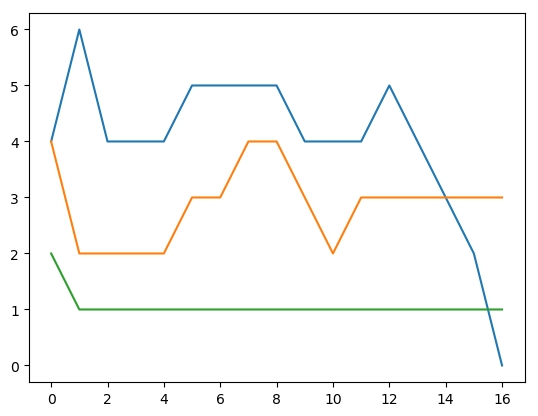

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13f515410>

In [48]:
plot(out["q_nnz"]); plot(out["y_nnz"]); plot(out["linesearch"])

In [35]:
srand(1)
x = [randn(5*10^3);3*randn(5*10^3)];
s = ones(10^4);
iter = 10;
mult = 4.^(0.6.^(1:iter));
m_range = zeros(iter); ip = zeros(iter); act = zeros(iter);
for i = 1:iter
    L = ash(x,s, mult = mult[i])[3];
    m_range[i] = size(L,2);
    ip[i] = mean(QPsubprob(L, method = "mosek2")["eachQPtime"]);
    act[i] = mean(QPsubprob(L, method = "activeset")["eachQPtime"]);
    println(i)
end

1
2
3
4
5
6
7
8
9
10


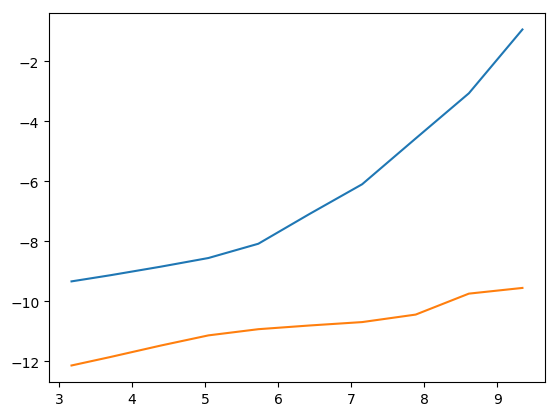

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x10a082d50>

In [36]:
plot(log2.(m_range),log2.(ip)); plot(log2.(m_range), log2.(act))

In [43]:
srand(1)
iter = 11;
Z = randn(5,10^5) .* [1;1;1;3;6];
z = Z[:]; s = ones(5*10^5);
n_range = 220 * 2.^(1:iter);
m_range = zeros(iter); ip = zeros(iter); act = zeros(iter);
for i = 1:iter
    n = n_range[i];
    L = ash(z[1:n],s[1:n], mult = 1.2)[3][:,1:31];
    m_range[i] = size(L,2);
    ip[i] = mean(QPsubprob(L, method = "mosek2")["eachQPtime"]);
    act[i] = mean(QPsubprob(L, method = "activeset")["eachQPtime"]);
    println(i)
end

1
2
3
4
5
6
7
8
9
10
11


In [44]:
[n_range m_range ip act]

11×4 Array{Float64,2}:
    440.0  31.0  0.00257837  0.000342933
    880.0  31.0  0.00244938  0.000741913
   1760.0  31.0  0.00229451  0.000617467
   3520.0  31.0  0.00254097  0.000671296
   7040.0  31.0  0.00242329  0.000569847
  14080.0  31.0  0.00254144  0.000620219
  28160.0  31.0  0.00252902  0.000673605
  56320.0  31.0  0.00249937  0.000539119
 112640.0  31.0  0.00261541  0.000645523
 225280.0  31.0  0.00261211  0.000603885
 450560.0  31.0  0.00312613  0.000545644

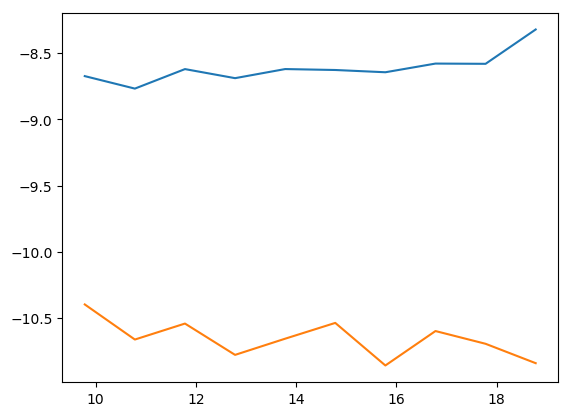

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13f3ea490>

In [46]:
plot(log2.(n_range[2:end]),log2.(ip[2:end])); plot(log2.(n_range[2:end]), log2.(act[2:end]))